In [48]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt

In [49]:
img = cv.imread('img/park.jpg').astype(np.float32)/255.0
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)

False

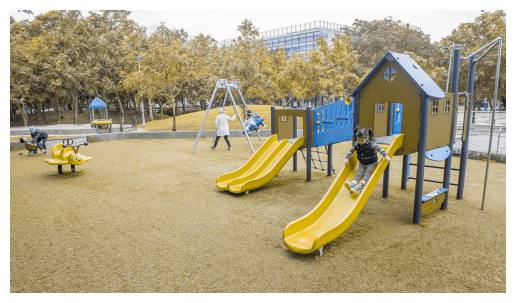

In [50]:
# 紅綠色盲
lab_red_green_obstacle = lab
lab_red_green_obstacle[:,:,1] *=0
img_lab_red_green_obstacle = (cv.cvtColor(lab_red_green_obstacle, cv.COLOR_LAB2BGR))*255
img_lab_red_green_obstacle = img_lab_red_green_obstacle.astype(np.uint8)

fig = plt.figure()
plt.axis('off')
plt.imshow(cv.cvtColor(img_lab_red_green_obstacle, cv.COLOR_BGR2RGB))
cv.imwrite('img/紅綠色盲.jpg', img_lab_red_green_obstacle)



False

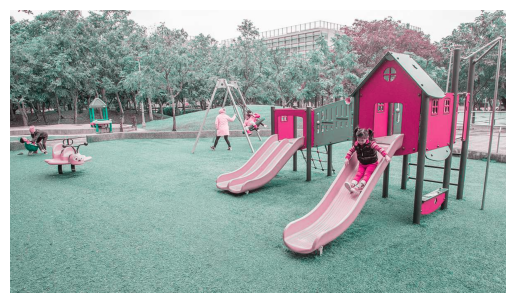

In [51]:
# 黃藍色盲
img = cv.imread('img/park.jpg').astype(np.float32)/255.0
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
lab[:,:,2] *=0
img = (cv.cvtColor(lab, cv.COLOR_LAB2BGR))*255
img = img.astype(np.uint8)

fig = plt.figure()
plt.axis('off')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
cv.imwrite('img/黃綠色盲.jpg', img)


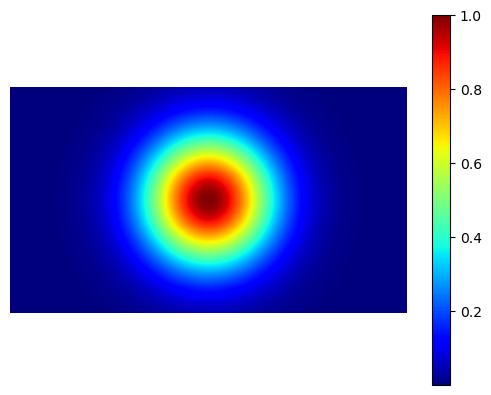

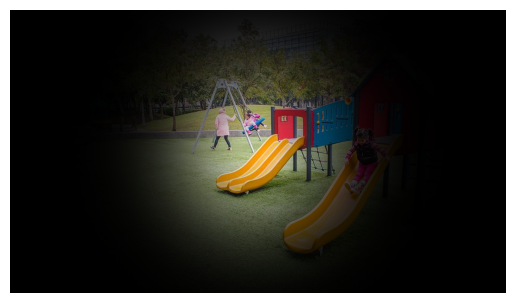

In [52]:
# 青光眼
img_Glaucoma = cv.imread('img/park.jpg').astype(np.float32)/255.0

# 高斯濾鏡(Gaussain filter)
gh ,hr = divmod(np.size(img_Glaucoma,0),2)
gw, wr = divmod(np.size(img_Glaucoma,1),2)
x, y = np.mgrid[-gh:gh+hr, -gw:gw+wr]
sigma = 14**2
gaussian_kernel= np.exp(-(x**2+y**2)/(sigma**2))

#Normalization
gaussian_kernel = gaussian_kernel / gaussian_kernel.max()
blur = np.zeros(img_Glaucoma.shape)
fig = plt.figure()
plt.axis('off')
plt.imshow(gaussian_kernel, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()

blur[:,:,0] = (img_Glaucoma[:,:,0] * gaussian_kernel)
blur[:,:,1] = (img_Glaucoma[:,:,1] * gaussian_kernel)
blur[:,:,2] = (img_Glaucoma[:,:,2] * gaussian_kernel)
blur = (blur*255).astype(np.uint8)

fig = plt.figure()
plt.axis('off')
plt.imshow(cv.cvtColor(blur, cv.COLOR_BGR2RGB))
